<a href="https://colab.research.google.com/github/Gyanendra079/Airbnb-Bookings-Analysis---Capstone-project/blob/main/%5BGyanendra_kumar_Porwal_%5DAirbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [3]:
#importing the various libraries which are helpful in data analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#for ignoring the warning in data visulaization
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# creating the file from the airbnb booking analysis csv(comma seperated values) file  
file_path = '/content/drive/MyDrive/almabetter/capstone projects/python project 1/Airbnb NYC 2019.csv'
#using the read_csv function to read the given file
airbnb_df= pd.read_csv(file_path)
airbnb_df_copy = airbnb_df.copy()

In [7]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Different types of columns in airbnb data where the data analysis is to be performed
*   id: listing ID
*   name: name of the listing
*   host_id: host ID
*   host_name: name of the host
*   neighbourhood_group: location
*   neighbourhood: area
*   latitude: latitude coordinates
*   longitude: longitude coordinates
*   room_type: listing space type
*   price: price of room
*   minimum_nights: amount of nights minimum to stay
*   number_of_reviews: number of reviews
*   last_review: latest review
*   reviews_per_month: number of reviews per month
*   calculated_host_listings_count: amount of listing per host
*   avalability_365 : no of days rooms available in a 1 year(365days)





In [9]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
# to get the shape of the data
airbnb_df.shape

(48895, 16)

Various point to be noted regarding the data given in project-
1.   name,host_name,neighbourhood_group,neighbourhood,room_type and last_reviews are the categorical columns where the value is referred as object type. 
2.   All the others columns are numerical data.
3.   name,host_name,last_review and reviews_per_month are the columns containing the null values so either we will drop the columns or we will fill the null values with some appropriate value to perform the data analysis






In [11]:
airbnb_df[['name','host_name','last_review','reviews_per_month']]

,name,host_name,last_review,reviews_per_month
0,Clean & quiet apt home by the park,John,2018-10-19,0.21
1,Skylit Midtown Castle,Jennifer,2019-05-21,0.38
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,NaN,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,2019-07-05,4.64
4,Entire Apt: Spacious Studio/Loft by central park,Laura,2018-11-19,0.10
...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,NaN,NaN
48891,Affordable room in Bushwick/East Williamsburg,Marisol,NaN,NaN
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,NaN,NaN
48893,43rd St. Time Square-cozy single bed,Taz,NaN,NaN


*   Here the host_name have null values may be because the rooms in booking may not functional or host withdraw from the site whatever can be the reason so we need to handle the data numerically and categorically and these two columns are irrevelant to that part.
*   Next we have last_review as null which can be due to no review given or room not functional and reviews_per_month no of reviews given to the particular room in a month divided by booking numbers in a month.We can handle them by either by dropping or assigning them to zero values.
*   Id is also not relevant in data analysis








In [12]:
#We are dropping the id,name,host_id,host_name and last review
airbnb_df.drop(['id','host_name','last_review'], axis=1, inplace=True)
#examing the changes
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [13]:
#Filling the null values of column review_per_month with zero value
airbnb_df['reviews_per_month'].fillna(0, inplace=True)
#Filling the null value of name with "NO HOST"
airbnb_df['name'].fillna("NO HOST", inplace=True) 

In [14]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

Now the data looks much more cleaner so we can further proceed to our exploratory data analysis and to do that we need to formulate some questions and further analyse the data on the basis of those question. 

#Find out which neighbourhood_group has how much number of the room present in there respective region.

In [15]:
# grouping by neighbourhood group and print out the size on the basis of a particular neighbourhood group
num_of_room_present = airbnb_df.groupby("neighbourhood_group").size()
print(num_of_room_present)

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
dtype: int64


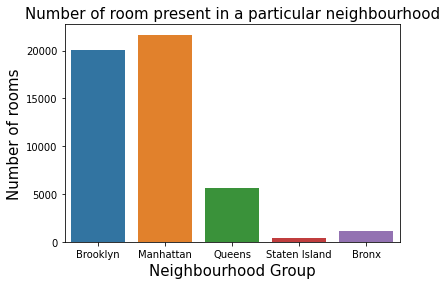

In [41]:
# title to be plot
plt.title("Number of room present in a particular neighbourhood",fontsize=15)
# ploting the bar chart using countplot
sns.countplot(x = airbnb_df["neighbourhood_group"])
#y-label
plt.ylabel('Number of rooms',fontsize=15)
#x-label
plt.xlabel('Neighbourhood Group',fontsize=15)
#show the plot
plt.show()

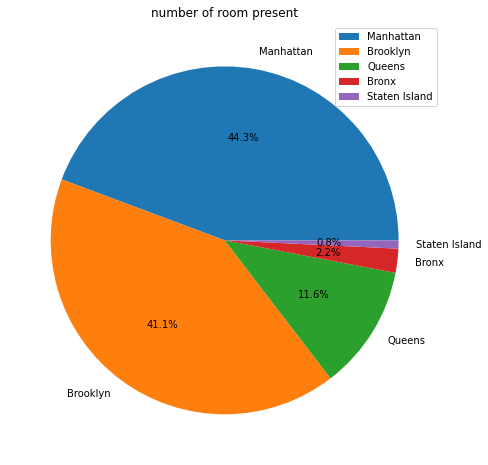

In [51]:
#pie plot
plt.figure(figsize=(8,8))
plt.title("number of room present")
pie_plot = plt.pie(airbnb_df.neighbourhood_group.value_counts(),labels=airbnb_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%')
plt.legend()

We can see that that manhatten **(44.3%)** is given the first position as it contains the most number of rooms followed by brooklyn **(41.1%)** and staten island has least rooms on airbnb site only **1.8%**.




#The different types of room available to the person travelling and booking through airbnb site.

In [18]:
#assigning the different room type available in a list
list_of_types_of_room_available = list(airbnb_df.room_type.unique())
#print the list of different room type available
print(list_of_types_of_room_available)

['Private room', 'Entire home/apt', 'Shared room']


In [19]:
# assigning no of room available in aparticular room type
different_room_type = airbnb_df["room_type"].value_counts()
#print the count of various room types
print(different_room_type)

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


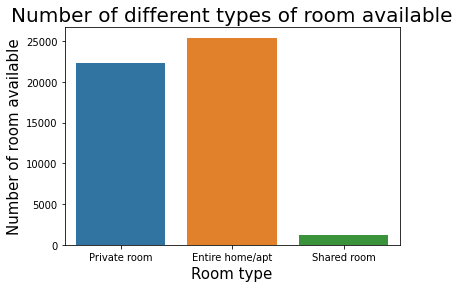

In [38]:
#plot the bar graph using seaborn countplot
sns.countplot(x = airbnb_df["room_type"])
#title
plt.title('Number of different types of room available',fontsize=20)
#y-label
plt.ylabel('Number of room available',fontsize=15)
#x-label
plt.xlabel('Room type',fontsize=15)
#show the plot
plt.show()

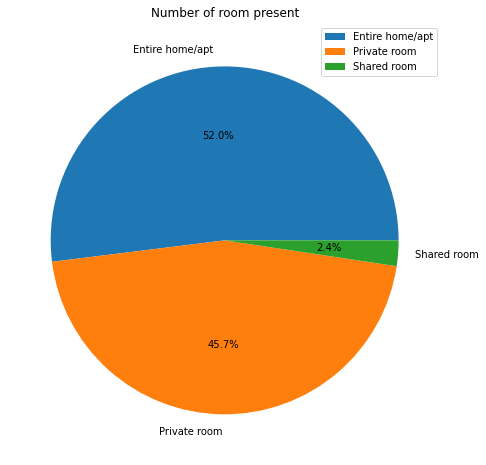

In [53]:
#pie plot
plt.figure(figsize=(8,8))
plt.title("Number of room present")
pie_plot = plt.pie(different_room_type,labels=different_room_type.index,autopct='%1.1f%%')
plt.legend()

The room type which is available highest is Entire home/apt**(52.8%)** & shared room**(2.4%)** is very low in comparison to the other two room type.

#The different types of room available to the people in various neighbourhood group

In [42]:
#different room type in various neighbouhood
roomtype_in_various_neigh = airbnb_df.groupby('neighbourhood_group')['room_type'].value_counts().unstack()
#printing the different room type in various neighbouhood
print(roomtype_in_various_neigh)

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            379           652           60
Brooklyn                        9559         10132          413
Manhattan                      13199          7982          480
Queens                          2096          3372          198
Staten Island                    176           188            9


Text(0, 0.5, 'Room types')

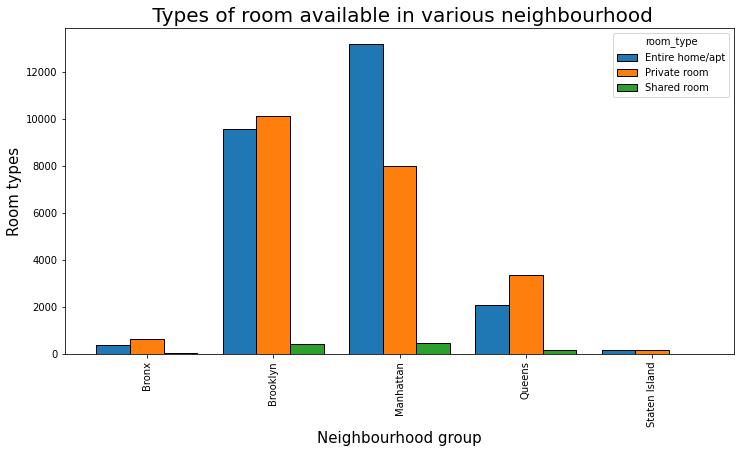

In [47]:
#defining the bar char in axis variable
ax = roomtype_in_various_neigh.plot.bar(width=0.8,linewidth=1,edgecolor='black',figsize = (12,6),fontsize = 10)
# Set title
ax.set_title(" Types of room available in various neighbourhood", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Neighbourhood group", fontsize = 15)
ax.set_ylabel("Room types", fontsize = 15)

The Manhattan has the maximum no. of room type in the category of Entire home/apt which is 13199 & Brooklyn has highest no. in the category of Private room.

#1.   Plot on the basis on location(longitude,latitude) plot the room available in the given neighbourhood_group.
#2.   Plot on the basis on location(longitude,latitude) plot various room types avalable.



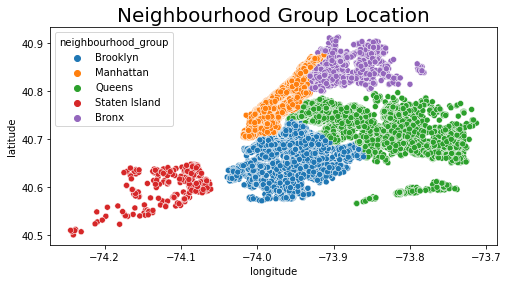

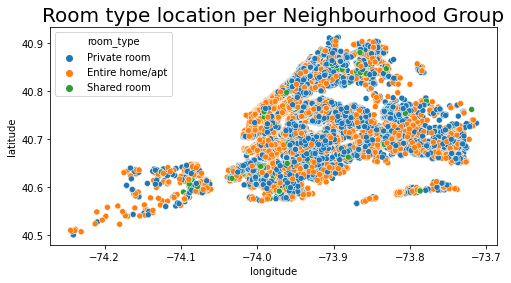

In [62]:
plt.figure(figsize=(8,4))
ax = sns.scatterplot(airbnb_df["longitude"],airbnb_df["latitude"],hue=airbnb_df['neighbourhood_group'])
ax.set_title('Neighbourhood Group Location',fontsize=20)
plt.show()

plt.figure(figsize=(8,4))
ax = sns.scatterplot(airbnb_df["longitude"],airbnb_df["latitude"],hue=airbnb_df['room_type'])
ax.set_title('Room type location per Neighbourhood Group',fontsize=20)
plt.show()


We can conclude-
1.   Brooklyn contains all rooms in closed packed space, manhattan in less width and long space,queens are wider and longer,bronx in smaller closed packed space than brooklyn and staten island have rooms available seperately in a unclosed or openly manner. 
2.   We can see the private room and entire home/apt largely in various location as they are present in larger amount in comparison to shared room.

